### Part 1

Explore the accuracy of the perceptron on the breast cancer dataset while varying the number of epochs that the perceptron is trained.  Measure accuracy on both the training and test sets and plot the results as a function of number of epochs (best to use a logarithmic axis for the x-axis, using plt.semilogx).  What can you conclude?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
X, y = data = load_breast_cancer(return_X_y=True)
y[y == 0] = -1

In [3]:
#Adding a bias term to the feature matrix
X = np.hstack([X, np.ones((len(X), 1))])
X.shape

(569, 31)

In [4]:
#Spliting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [5]:
#Class for the implementation of the perceptron algorithm
class perceptron :
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, iterations=100, learning_rate=0.2, 
                 plot_data=False, random_w=False, seed=42) :
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = plot_data
        self.random_w = random_w
        self.seed = seed
  
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        
        if self.random_w :
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, len(X[0]))
            print("initialized with random weight vector")
        else :
            self.w = np.zeros(len(X[0]))
            print("initialized with a zeros weight vector")
        self.wold = self.w
        converged = False
        iteration = 0
        while (not converged and iteration <= self.iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.wold = self.w
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    if self.plot_data:
                        self.plot_update(X, y, i)
            iteration += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iteration)
 
    def decision_function(self, x) :
        return np.dot(x, self.w)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.dot(X, self.w)
        return np.sign(scores)
    
    def plot_update(self, X, y, ipt) :
        fig = plt.figure(figsize=(4,4))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.arrow(0,0,self.w[0],self.w[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='darkred')
        plt.arrow(0,0,self.wold[0],self.wold[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='orange')
        anew = -self.w[0]/self.w[1]
        aold = -self.wold[0]/self.wold[1]
        pts = np.linspace(-1,1)
        plt.plot(pts, anew*pts, color='darkred')
        plt.plot(pts, aold*pts, color='orange')
        plt.title("in orange:  old w; in red:  new w")
        cols = {1: 'g', -1: 'b'}
        for i in range(len(X)): 
            plt.plot(X[i][0], X[i][1], cols[y[i]]+'o', alpha=0.6,markersize=5) 
        plt.plot(X[ipt][0], X[ipt][1], 'ro', alpha=0.2,markersize=20)


In [6]:
num_epochs = [2, 5, 10, 20, 40, 100, 200, 500, 1000, 2000, 4000]

initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector


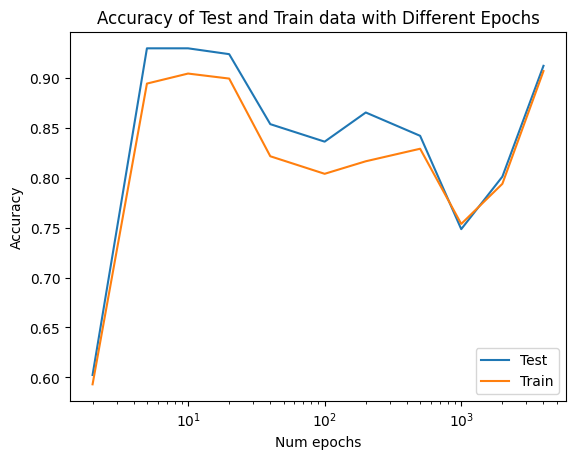

In [7]:
plt.figure()
test_values = []
train_values = []

for i in num_epochs:
    p = perceptron(iterations=i, learning_rate=0.1)
    p.fit(X_train, y_train)
    
    #for train data
    y_pred = p.predict(X_test)
    test_values.append(np.mean(y_test == y_pred))
    
    #for test data
    y_pred = p.predict(X_train)
    train_values.append(np.mean(y_train == y_pred))
    
#plot the data for both data
plt.semilogx(num_epochs, test_values, label='Test')
plt.semilogx(num_epochs, train_values, label='Train')

plt.title('Accuracy of Test and Train data with Different Epochs')
plt.xlabel('Num epochs')
plt.ylabel('Accuracy')
plt.legend()
    

*The test data is definitely more accurate with varying numbers of epochs. However, it is not so distinct to cause any problems, especially with higher numbers of epochs. The accuracy also seems to hit its peak at 10 epochs as it continues to decrease until 1000 epochs. Thereafter, it starts to increase again. I suspect this is due to overfitting the data between 10 and 1000 epochs. I think the most noticeable aspect is that the number of epochs matter more to the accuracy of the prediciton than which set of data is used.*

### Part 2

Can you tell if the breast cancer dataset is linearly separable?

*We can look at the accuracy of the perrceptron, which is a linear model, to see if the dataset if linearly seperable. Linear seperability refers to whether you can draw a decision boundary such as a line or hyperplane to seperate features. A high accuracy from a linear classifier algorithm such as a perceptron means that the features can be seperated with high accuracy, implying that the dataset is linearly seperable, but it does not say that it is perfectly seperable.*

### Part 3 

Do you observe differences in performance by changing the learning rate?
Use a plot of training and test accuracy as a function of learning rate to address this question.  Again, use plt.semilogx for the x-axis to have a logarithmic scale.

initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector
initialized with a zeros weight vector


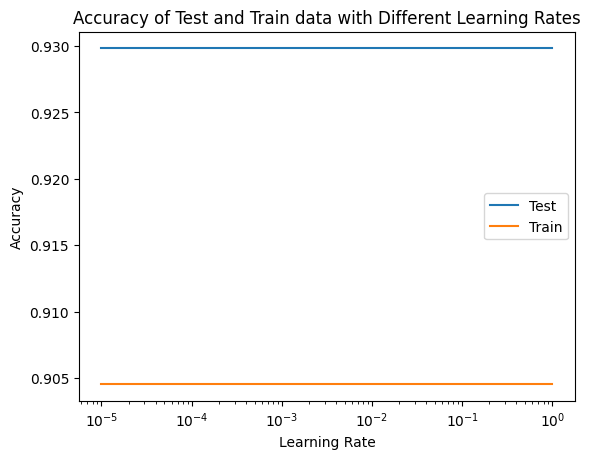

In [13]:
learning_rates = [0.00001, 0.001, 0.01, 0.1, 1]
plt.figure()
test_values = []
train_values = []

for i in learning_rates:
    p = perceptron(iterations=10, learning_rate=i)
    p.fit(X_train, y_train)
    
    #for train data
    y_pred = p.predict(X_test)
    test_values.append(np.mean(y_test == y_pred))
    
    #for test data
    y_pred = p.predict(X_train)
    train_values.append(np.mean(y_train == y_pred))
    
#plot the data for both data
plt.semilogx(learning_rates, test_values, label='Test')
plt.semilogx(learning_rates, train_values, label='Train')

plt.title('Accuracy of Test and Train data with Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

*With epochs set to 10, the learning rate for both, the train and test data, does not seem to affect the accuracy. With all 5 different values, it produces the same accuracy. I checked the accuracy by modifying the iterations as well, and they seem to generally match the accuracy discovered in the 1st part of the exercise.*